# Indicators of Heavy Traffic on I-94 Interstate Highway

In this project we are going to analyze a [dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) about the westbound traffic on the I-94 Interstate highway.  
The goal of our analysis is to determine a few indicators of heavy traffic on I-94.

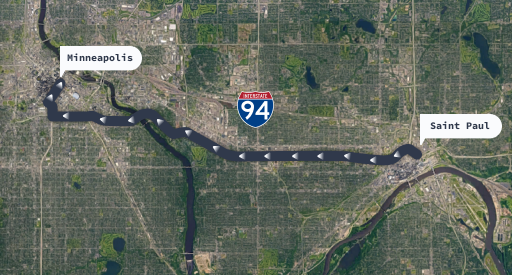

## Explore the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.  
A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the dataset [documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Analyzing Traffic Volume

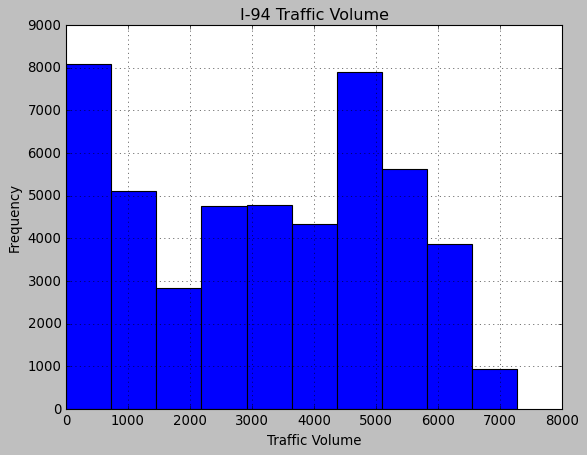

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [4]:
traffic['traffic_volume'].plot.hist()
plt.title('I-94 Traffic Volume')
plt.xlabel('Traffic Volume')
plt.grid()
plt.show()
print(traffic['traffic_volume'].describe())

Based on the graph and the result of Series.describe()
- the average of traffic volume are around 3259.
- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under on struction.
- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime with nighttime data.

## Daytime vs. Nighttime

We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m.(12hours)
- nighttime data: hours from 7 p.m. to 7 a.m.(12hours)

In [5]:
# covert `data_time` column to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = traffic[(traffic['date_time'].dt.hour >=7) & (traffic['date_time'].dt.hour <19 )]
print(day.shape)
night = traffic[(traffic['date_time'].dt.hour <7) | (traffic['date_time'].dt.hour >=19 )]
print(night.shape)

(23877, 9)
(24327, 9)


This difference in row numbers between `day` and `night` is due to a few hours of missing data.

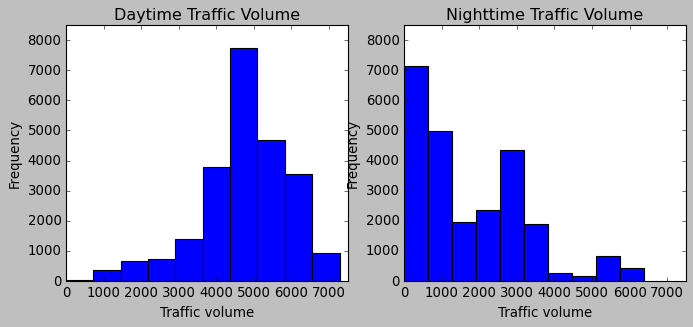

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
day['traffic_volume'].plot.hist()
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.ylim([0,8500])
plt.xlim([0,7500])

plt.subplot(1,2,2)
night['traffic_volume'].plot.hist()
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.ylim([0,8500])
plt.xlim([0,7500])

plt.show()

In [7]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Based on graphs above
- The distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high.
- On the contrary, the distribution of traffic volume during the night is right skewed. This means that most of the traffic volumne values are low.    

Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time Indicators - Month

One of the possible indicators of heavy traffic is time. There might be more people on the road in certain month, on a certain day, or at a certain time of the day.

Next we are going to look at a few line plots showing how the traffic volume changed according to the following parameter:
- Month
- Day fo the week
- Time of day

In [9]:
day['month'] = day['date_time'].dt.month.copy()
by_month = day.groupby('month').mean()
by_month['traffic_volume']

/var/folders/16/gtjhrbvx7g336_chk8m2dz3m0000gn/T/ipykernel_1113/3691684166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['month'] = day['date_time'].dt.month.copy()


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

In [10]:
by_month['traffic_volume'].iloc[6]

4595.03574432296

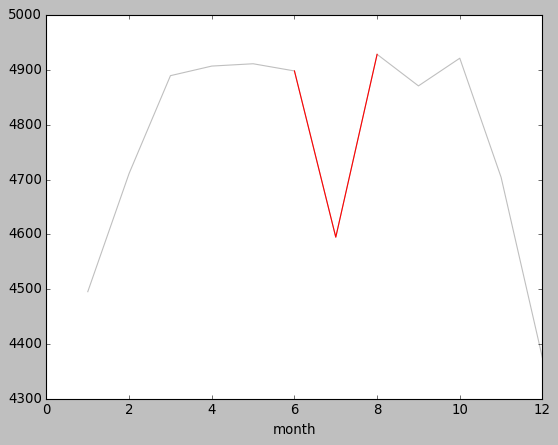

In [11]:
by_month['traffic_volume'].plot.line(c='gray', alpha=0.5)
by_month['traffic_volume'].iloc[5:8].plot.line(c='red')

plt.show()

The traffic looks heavier during warm months (March–October) than cold months (November–February), with one interesting exception: July. Is there anything special about July?
To answer the last question, let's see how the traffic volume changed each year in July

/var/folders/16/gtjhrbvx7g336_chk8m2dz3m0000gn/T/ipykernel_1113/1771773904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['year'] = day['date_time'].dt.year


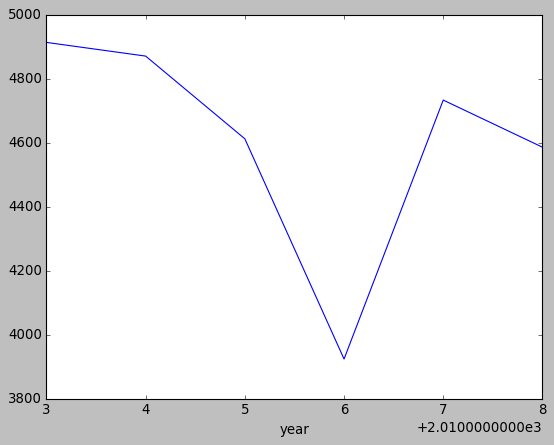

In [12]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Typically, the traffic is pretty heavy in July. The only exception we see is 2016. One possible reason for this is road construction - [this article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months.

## Time Indicators - Day of the Week

In [13]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

/var/folders/16/gtjhrbvx7g336_chk8m2dz3m0000gn/T/ipykernel_1113/1778748283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['dayofweek'] = day['date_time'].dt.dayofweek


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

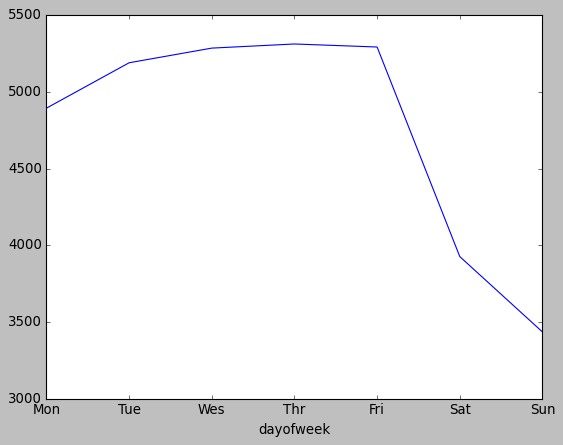

In [14]:
by_dayofweek['traffic_volume'].plot.line()
labels = ['Mon', 'Tue', 'Wes', 'Thr', 'Fri', 'Sat', 'Sun']
plt.xticks([0,1,2,3,4,5,6],labels)
plt.show()

The traffic volume of business days are significantly heavier than weekends.

## Time Indicators - Time of Day

Before we generate a line plot for the time of day, we should separate the weekends to prevent draging down the average values.

In [15]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day[day['dayofweek'] <= 4] # 4 == Friday
weekend = day[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


/var/folders/16/gtjhrbvx7g336_chk8m2dz3m0000gn/T/ipykernel_1113/2479881323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour


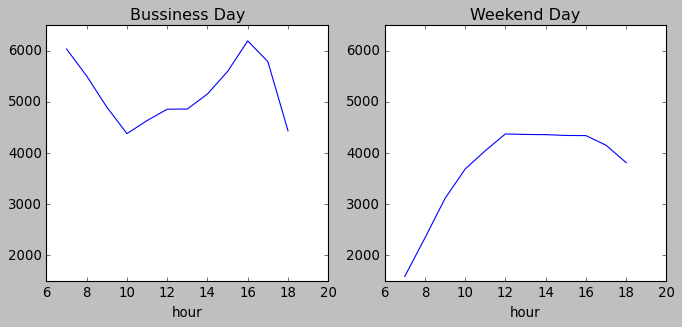

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Bussiness Day')
plt.xlim([6,20])
plt.ylim([1500,6500])

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend Day')
plt.xlim([6,20])
plt.ylim([1500,6500])
plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends.
As expected, on the business days, the rush hours are around 7 and 16.

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indecators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather.  
A few of these columns are numerical(`temp`, `rain_1h`, `snow_1h`, `clouds_all`), so let's start by looking up their correlation values with `traffic_volume` column.

In [17]:
day.drop(['month', 'year','dayofweek', 'hour'], axis=1).corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

And it seems like none of numerical weather column is a reliable indicators. Let's generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`

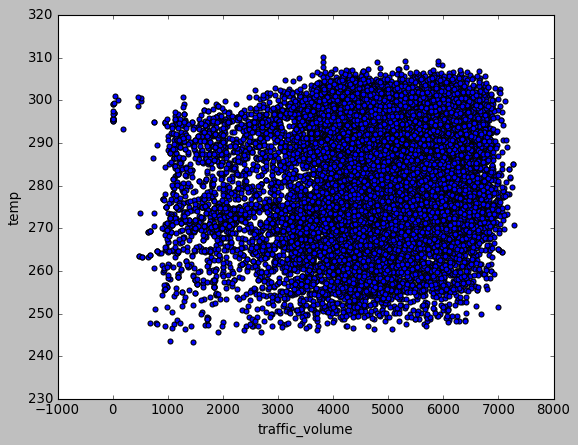

In [18]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim([230,320])
plt.show()

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

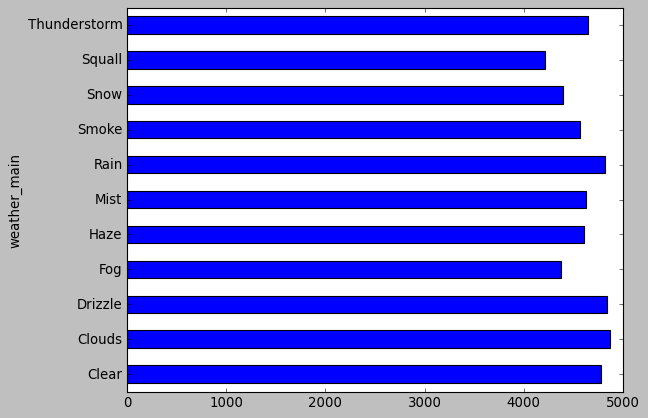

In [19]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

According the graph above, there is no certain weather conditon cause the traffic volume exceeding 5,000 cars.  
This makes finding a heavy traffic indicator more difficult. Let's also group by `weather_description`, which has more granular weather classfication.

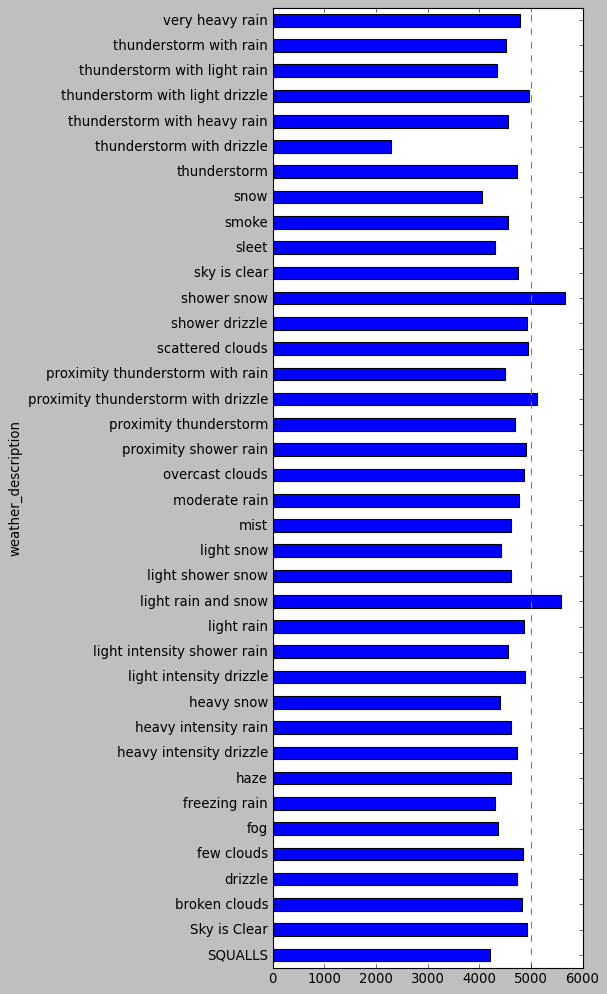

In [20]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,15))
plt.axvline(x=5000, c='gray', ls='--')
plt.show()

Based on the graph above, 
traffic volume exceeding 5,000 on three type of weather:
- shower snow
- light rain and snow
- proximity thunderstorm with drizzle 

# Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle